In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q 4a

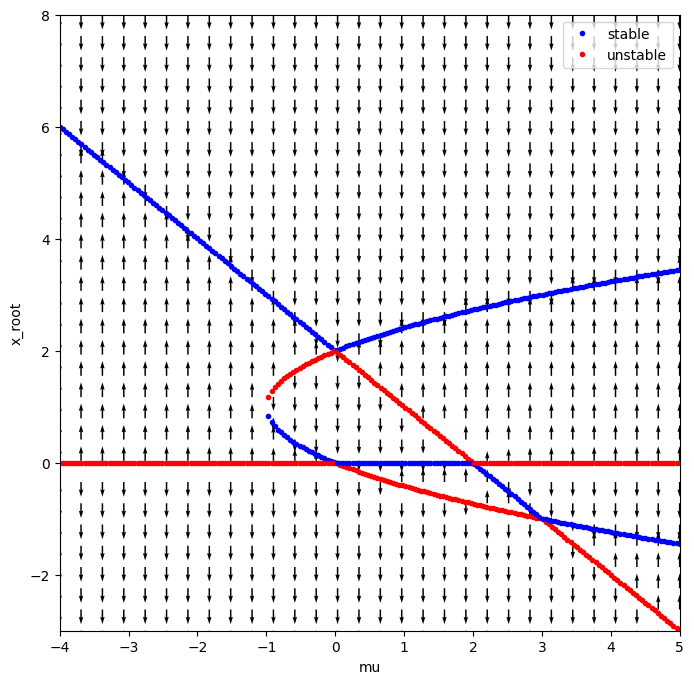

In [2]:
plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))

# set up domain
x_min = -4
x_max = 5
y_min = -3
y_max = 8
n_points = 30
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

# Define the system 
def vector_field(X, Y):
    # y axis is x, x axis is mu
    dx = 0*X
    dy = Y * (X + Y - 2) * (X + 2*Y - Y**2)

    # normalize
    dy = dy / (np.sqrt(dy**2)+0.01) # 0.01 to handle divide by 0
    return dx, dy

# find roots at each mu
seed_x = []
seed_mu = []
for mu in np.linspace(x_min, x_max, 200):
    # compute coeff for each mu
    coeff = [-1, 4-mu, 3*mu-4, mu**2-2*mu, 0] # x^4, x^3, ...
    # Find roots
    roots = np.roots(coeff)
    real_roots = roots[np.isreal(roots)].real

    # plot root
    for root in real_roots:
        # pick color based on immediate vector pointing away or not
        dx, dy = vector_field(mu, root+0.01)
        if dy > 0:
            color = 'r'
        else:
            color = 'b'
        # ax.plot([mu]*len(real_roots), real_roots, 'r.')
        ax.plot(mu, root, f'{color}.')

    # set starting points for stream plot
    for root in real_roots:
        seed_x.append(root+0.01)
        seed_x.append(root-0.01)
        seed_x.append(y_min)
        seed_x.append(y_max)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
# seed_points = np.array([seed_mu, seed_x])
# ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=1, start_points=seed_points.T, arrowsize=1.5)
ax.quiver(X, Y, U, V, color="black", linewidth=0.8, scale=42)

# labeling
ax.set_xlabel("mu")
ax.set_ylabel("x_root")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

# legend
ax.plot(20, 20, 'b.', label='stable')
ax.plot(20, 20, 'r.', label='unstable')
ax.legend()

plt.show()


## Q 4b

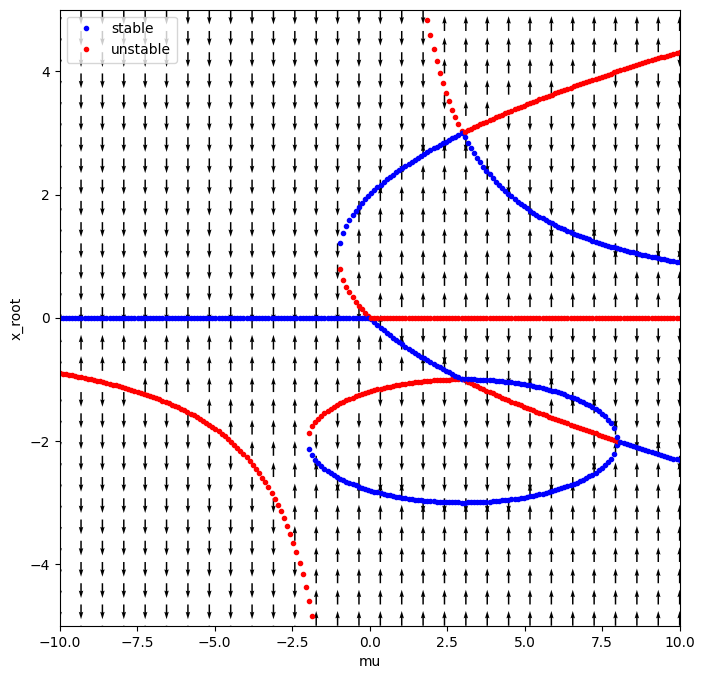

In [3]:
plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))

# set up domain
x_min = -10
x_max = 10
y_min = -5
y_max = 5
n_points = 30
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

# Define the system 
def vector_field(X, Y):
    # y axis is x, x axis is mu
    dx = 0*X
    dy = Y * (9 - X*Y) * (X + 2*Y - Y**2) * ((Y+2)**2 + 1/25*(X-3)**2 - 1)

    # normalize
    dy = dy / (np.sqrt(dy**2)+0.01) # 0.01 to handle divide by 0
    return dx, dy

# find roots at each mu
seed_x = []
seed_mu = []
for mu in np.linspace(x_min, x_max, 200):
    # compute coeff for each mu
    coeff = [mu,
             2*mu-9,
             1/25*mu**3-31/25*mu**2-116/25*mu-18,
             -2/25*mu**3-97/25*mu**2+111/25*mu+1044/25,
             -1/25*mu**4+6/25*mu**3-66/25*mu**2+792/25*mu+3024/50,
             9/25*mu**3-54/25*mu**2+756/25*mu,
             0] # x^6, x^5, ..., x^1, c
    # Find roots
    roots = np.roots(coeff)
    real_roots = roots[np.isreal(roots)].real

    # plot root
    for root in real_roots:
        # pick color based on immediate vector pointing away or not
        dx, dy = vector_field(mu, root+0.01)
        if dy > 0:
            color = 'r'
        else:
            color = 'b'
        # ax.plot([mu]*len(real_roots), real_roots, 'r.')
        ax.plot(mu, root, f'{color}.')

    # set starting points for stream plot
    for root in real_roots:
        seed_x.append(root+0.01)
        seed_x.append(root-0.01)
        seed_x.append(y_min)
        seed_x.append(y_max)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
# seed_points = np.array([seed_mu, seed_x])
# ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=1, start_points=seed_points.T, arrowsize=1.5)
ax.quiver(X, Y, U, V, color="black", linewidth=0.8, scale=42)

# labeling
ax.set_xlabel("mu")
ax.set_ylabel("x_root")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

# legend
ax.plot(20, 20, 'b.', label='stable')
ax.plot(20, 20, 'r.', label='unstable')
ax.legend()

plt.show()


## Q 4b perturb

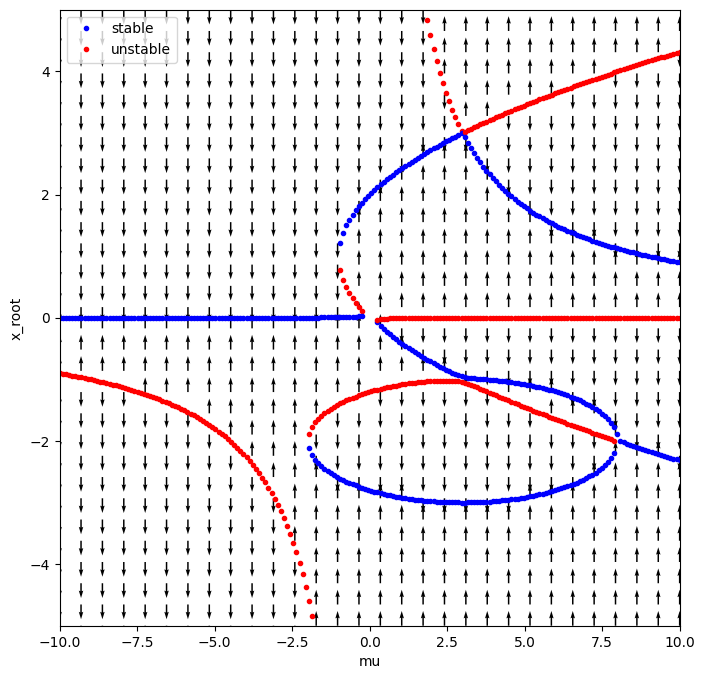

In [4]:
plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))

# set up domain
x_min = -10
x_max = 10
y_min = -5
y_max = 5
n_points = 30
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

# add perturbation epsilon
epsilon = 0.2

# Define the system 
def vector_field(X, Y):
    # y axis is x, x axis is mu
    dx = 0*X
    dy = Y * (9 - X*Y) * (X + 2*Y - Y**2) * ((Y+2)**2 + 1/25*(X-3)**2 - 1) + epsilon

    # normalize
    dy = dy / (np.sqrt(dy**2)+0.01) # 0.01 to handle divide by 0
    return dx, dy

# find roots at each mu
seed_x = []
seed_mu = []
for mu in np.linspace(x_min, x_max, 200):
    # compute coeff for each mu
    coeff = [mu,
             2*mu-9,
             1/25*mu**3-31/25*mu**2-116/25*mu-18,
             -2/25*mu**3-97/25*mu**2+111/25*mu+1044/25,
             -1/25*mu**4+6/25*mu**3-66/25*mu**2+792/25*mu+3024/50,
             9/25*mu**3-54/25*mu**2+756/25*mu,
             epsilon] # x^6, x^5, ..., x^1, c
    # Find roots
    roots = np.roots(coeff)
    real_roots = roots[np.isreal(roots)].real

    # plot root
    for root in real_roots:
        # pick color based on immediate vector pointing away or not
        dx, dy = vector_field(mu, root+0.01)
        if dy > 0:
            color = 'r'
        else:
            color = 'b'
        # ax.plot([mu]*len(real_roots), real_roots, 'r.')
        ax.plot(mu, root, f'{color}.')

    # set starting points for stream plot
    for root in real_roots:
        seed_x.append(root+0.01)
        seed_x.append(root-0.01)
        seed_x.append(y_min)
        seed_x.append(y_max)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
# seed_points = np.array([seed_mu, seed_x])
# ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=1, start_points=seed_points.T, arrowsize=1.5)
ax.quiver(X, Y, U, V, color="black", linewidth=0.8, scale=42)

# labeling
ax.set_xlabel("mu")
ax.set_ylabel("x_root")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

# legend
ax.plot(20, 20, 'b.', label='stable')
ax.plot(20, 20, 'r.', label='unstable')
ax.legend()

plt.show()


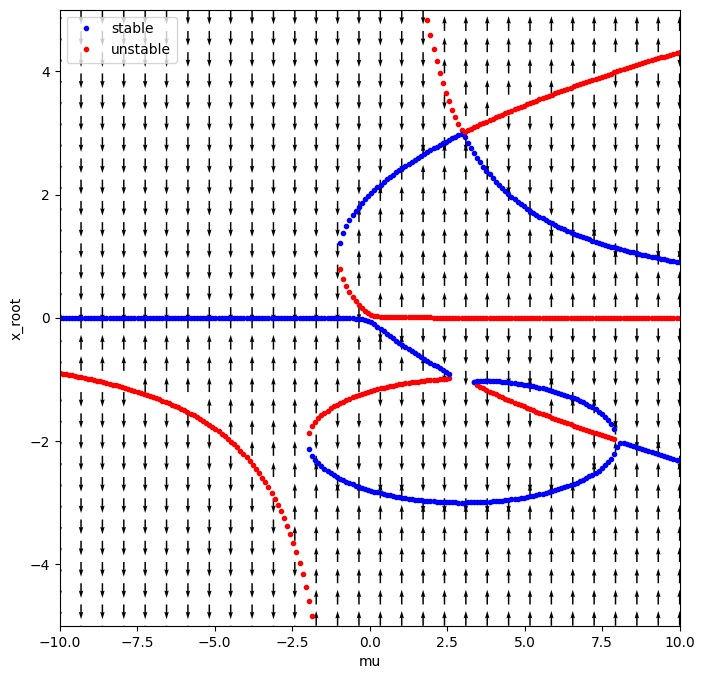

In [5]:
plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))

# set up domain
x_min = -10
x_max = 10
y_min = -5
y_max = 5
n_points = 30
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

# add perturbation epsilon
epsilon = -0.2

# Define the system 
def vector_field(X, Y):
    # y axis is x, x axis is mu
    dx = 0*X
    dy = Y * (9 - X*Y) * (X + 2*Y - Y**2) * ((Y+2)**2 + 1/25*(X-3)**2 - 1) + epsilon

    # normalize
    dy = dy / (np.sqrt(dy**2)+0.01) # 0.01 to handle divide by 0
    return dx, dy

# find roots at each mu
seed_x = []
seed_mu = []
for mu in np.linspace(x_min, x_max, 200):
    # compute coeff for each mu
    coeff = [mu,
             2*mu-9,
             1/25*mu**3-31/25*mu**2-116/25*mu-18,
             -2/25*mu**3-97/25*mu**2+111/25*mu+1044/25,
             -1/25*mu**4+6/25*mu**3-66/25*mu**2+792/25*mu+3024/50,
             9/25*mu**3-54/25*mu**2+756/25*mu,
             epsilon] # x^6, x^5, ..., x^1, c
    # Find roots
    roots = np.roots(coeff)
    real_roots = roots[np.isreal(roots)].real

    # plot root
    for root in real_roots:
        # pick color based on immediate vector pointing away or not
        dx, dy = vector_field(mu, root+0.01)
        if dy > 0:
            color = 'r'
        else:
            color = 'b'
        # ax.plot([mu]*len(real_roots), real_roots, 'r.')
        ax.plot(mu, root, f'{color}.')

    # set starting points for stream plot
    for root in real_roots:
        seed_x.append(root+0.01)
        seed_x.append(root-0.01)
        seed_x.append(y_min)
        seed_x.append(y_max)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)
        seed_mu.append(mu)

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
# seed_points = np.array([seed_mu, seed_x])
# ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=1, start_points=seed_points.T, arrowsize=1.5)
ax.quiver(X, Y, U, V, color="black", linewidth=0.8, scale=42)

# labeling
ax.set_xlabel("mu")
ax.set_ylabel("x_root")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

# legend
ax.plot(20, 20, 'b.', label='stable')
ax.plot(20, 20, 'r.', label='unstable')
ax.legend()

plt.show()


## Q 6a

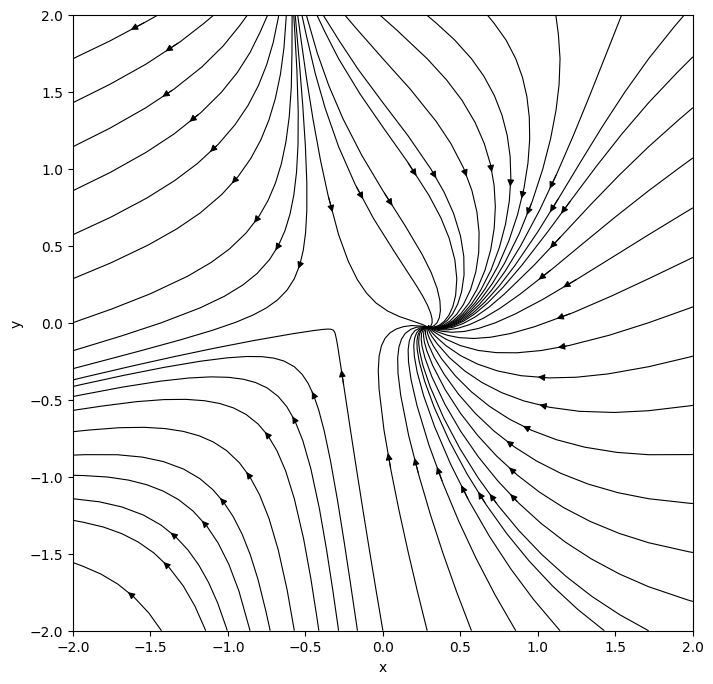

In [6]:
# set up domain
x_min = y_min = -2
x_max = y_max = 2
n_points = 100
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

mu = 0.3
# Define the system 
def vector_field(X, Y):
    dx = mu + Y - 3*X**2 + X*Y
    dy = -3*Y + Y**2 - X**2
    return dx, dy

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=0.5)

# Setting up the plot
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

plt.show()


## Q 6b

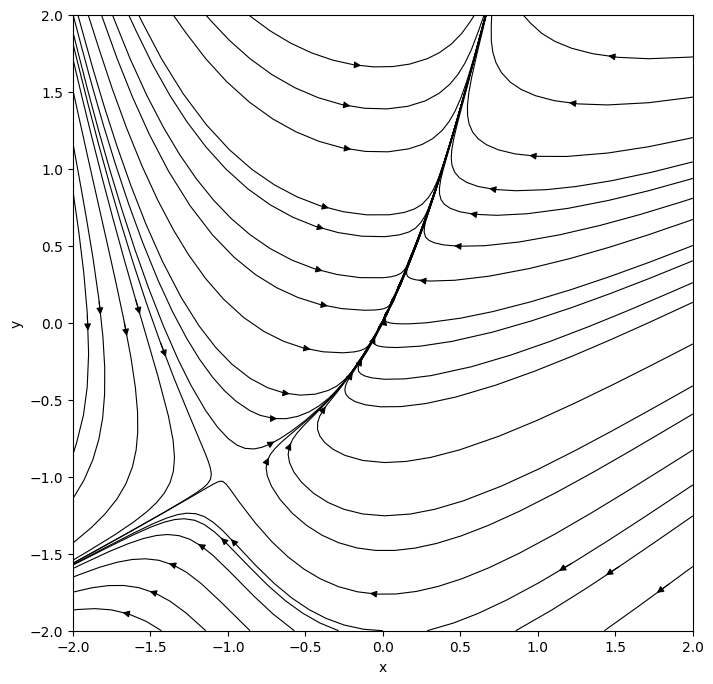

In [7]:
# set up domain
x_min = y_min = -2
x_max = y_max = 2
n_points = 100
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

mu = 0.02
# Define the system 
def vector_field(X, Y):
    dx = -2*X + Y - X**2
    dy = mu + X*(Y - X)
    return dx, dy

# Calculate vector field
U, V = vector_field(X, Y)

# Plot the vector field
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.streamplot(X, Y, U, V, color="black", linewidth=0.8, broken_streamlines=False, density=0.5)

# Setting up the plot
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)

plt.show()


## Q 7

In [10]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))
# set up domain
x_min = y_min = -1.5
x_max = y_max = 1.5
n_points = 50
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

n_points = 20
dx = (x_max-x_min)/n_points
dy = (y_max-y_min)/n_points
x_range = np.linspace(x_min+dx/2, x_max-dx/2, n_points-1)
y_range = np.linspace(y_min+dy/2, y_max-dy/2, n_points-1)
X_quiver, Y_quiver = np.meshgrid(x_range, y_range)

# Define the system 
def vector_field(X, Y, mu):
    dx = X * (1 - Y - 4*X**2)
    dy = Y * (mu - Y - X**2)
    # normalize
    mag = np.sqrt(dx**2 + dy**2)
    mag[mag < 1e-6] = 1
    dx = dx/(mag+0.01)
    dy = dy/(mag+0.01)
    return dx, dy


def update(mu = 0.1):
    ax.clear()
    # draw
    # Calculate vector field
    U, V = vector_field(X, Y, mu)
    ax.streamplot(X, Y, U, V, color="black", linewidth=1, broken_streamlines=False, density=0.8)

    U, V = vector_field(X_quiver, Y_quiver, mu)
    ax.quiver(X_quiver, Y_quiver, U, V, color="black", scale=30, alpha=0.3)
    # fixed points
    ax.plot(0,0, 'ro')
    ax.plot(0,mu, 'ro')
    ax.plot(1/2,0, 'ro')
    ax.plot(-1/2,0, 'ro')
    if mu < 1.0:
        ax.plot(np.sqrt(1/3-1/3*mu), (4*mu-1)/3, 'bo')
        ax.plot(-np.sqrt(1/3-1/3*mu), (4*mu-1)/3, 'bo')

    # Setting up the plot
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)
    plt.show()

interact(update, mu = (0.1,1.5,0.15));

# bifurcation at mu = 1/4 and mu = 1
# transcritical for (+-1/2, 0) FP
# supercritical pitch fork for (0, mu)


interactive(children=(FloatSlider(value=0.1, description='mu', max=1.5, min=0.1, step=0.15), Output()), _dom_c…

## Q 8

In [9]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(8,8))
# set up domain
x_min = y_min = -1.5
x_max = y_max = 1.5
n_points = 50
x_range = np.linspace(x_min, x_max, n_points)
y_range = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x_range, y_range)

n_points = 20
dx = (x_max-x_min)/n_points
dy = (y_max-y_min)/n_points
x_range = np.linspace(x_min+dx/2, x_max-dx/2, n_points-1)
y_range = np.linspace(y_min+dy/2, y_max-dy/2, n_points-1)
X_quiver, Y_quiver = np.meshgrid(x_range, y_range)

# Define the system 
omega = 0.5
def vector_field(X, Y, mu):
    dx = mu*X + omega*(X + Y) - X*(4*X**2 + Y**2)
    dy = mu*Y - omega*(2*X + Y) - Y*(4*X**2 + Y**2)
    # normalize
    mag = np.sqrt(dx**2 + dy**2)
    mag[mag < 1e-6] = 1
    dx = dx/(mag+0.01)
    dy = dy/(mag+0.01)
    return dx, dy


def update(mu=-1):
    ax.clear()
    # draw
    # Calculate vector field
    U, V = vector_field(X, Y, mu)
    ax.streamplot(X, Y, U, V, color="black", linewidth=1, broken_streamlines=False, density=0.7)

    U, V = vector_field(X_quiver, Y_quiver, mu)
    ax.quiver(X_quiver, Y_quiver, U, V, color="black", scale=30, alpha=0.3)

    # Setting up the plot
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x_min, x_max); ax.set_ylim(y_min, y_max)
    plt.show()

interact(update, mu = (-1,1,0.2));

# bifurcation at mu = 1/4 and mu = 1
# transcritical for (+-1/2, 0) FP
# supercritical pitch fork for (0, mu)


interactive(children=(FloatSlider(value=-1.0, description='mu', max=1.0, min=-1.0, step=0.2), Output()), _dom_…

No such comm: dd7a334d3c9843bc98fb32ae23a98833
